In [1]:
!pip install datasets tokenizers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.0 MB/s eta 0:00:00


In [2]:
dataset = {'id': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 'translation': [{'en': 'The Wanderer', 'fr': 'Le grand Meaulnes'}, {'en': 'Alain-Fournier', 'fr': 'Alain-Fournier'}, {'en': 'First Part', 'fr': 'PREMIÈRE PARTIE'}, {'en': 'I', 'fr': 'CHAPITRE PREMIER'}, {'en': 'THE BOARDER', 'fr': 'LE PENSIONNAIRE'}, {'en': 'He arrived at our home on a Sunday of November, 189-.', 'fr': 'Il arriva chez nous un dimanche de novembre 189-…'}, {'en': "I still say 'our home,' although the house no longer belongs to us.", 'fr': 'Je continue à dire « chez nous », bien que la maison ne nous appartienne plus.'}, {'en': 'We left that part of the country nearly fifteen years ago and shall certainly never go back to it.', 'fr': 'Nous avons quitté le pays depuis bientôt quinze ans et nous n’y reviendrons certainement jamais.'}, {'en': "We were living in the building of the Higher Elementary Classes at Sainte-Agathe's School.", 'fr': 'Nous habitions les bâtiments du Cours Supérieur de Sainte-Agathe.'}, {'en': "My father, whom I used to call M. Seurel as did other pupils, was head of the Middle School and also of the Higher Elementary classes where pupils worked for the preliminary teacher's examination.", 'fr': 'Mon père, que j’appelais M. Seurel, comme les autres élèves, y dirigeait à la fois le Cours Supérieur, où l’on préparait le brevet d’instituteur, et le Cours Moyen.'}]}

In [3]:
max_length_en_item = max(dataset['translation'], key=lambda x: len(x['en'].split()))
print(len(max_length_en_item['en'].split()))
print(max_length_en_item['en'])

34
My father, whom I used to call M. Seurel as did other pupils, was head of the Middle School and also of the Higher Elementary classes where pupils worked for the preliminary teacher's examination.


In [4]:
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.trainers import WordLevelTrainer
from tokenizers.pre_tokenizers import Whitespace

def get_all_sentences(ds, lang):
    for item in ds['translation']:
        yield item[lang]

tokenizer_en = Tokenizer(WordLevel(unk_token="[UNK]"))
tokenizer_en.pre_tokenizer = Whitespace()

trainer_en = WordLevelTrainer(special_tokens=["[UNK]", "[PAD]", "[SOS]", "[EOS]"])
tokenizer_en.train_from_iterator(get_all_sentences(dataset, 'en'), trainer=trainer_en)

tokenizer_fr = Tokenizer(WordLevel(unk_token="[UNK]"))
tokenizer_fr.pre_tokenizer = Whitespace()

trainer_fr = WordLevelTrainer(special_tokens=["[UNK]", "[PAD]", "[SOS]", "[EOS]"])
tokenizer_fr.train_from_iterator(get_all_sentences(dataset, 'fr'), trainer=trainer_fr)


In [5]:
def tokenize_data(dataset, tokenizer_en, tokenizer_fr):
    tokenized_data_en = []
    tokenized_data_fr = []
    for example in dataset['translation']:
        tokenized_data_en.append(tokenizer_en.encode(example['en']).ids)
        tokenized_data_fr.append(tokenizer_fr.encode(example['fr']).ids)
    return tokenized_data_en, tokenized_data_fr


tokenized_data_en,  tokenized_data_fr = tokenize_data(dataset, tokenizer_en, tokenizer_fr)

In [16]:
print(tokenized_data_en[0])
print(tokenized_data_en[9])
print(tokenized_data_fr[9])
print(len(tokenized_data_en[9]))
print(len(tokenized_data_fr[9]))

[41, 42]
[34, 58, 8, 86, 9, 82, 10, 52, 32, 5, 38, 48, 56, 73, 20, 8, 83, 62, 6, 4, 33, 14, 16, 45, 6, 4, 13, 12, 54, 85, 20, 87, 60, 4, 75, 79, 7, 21, 57, 5]
[33, 76, 4, 18, 64, 8, 43, 31, 5, 40, 4, 52, 17, 45, 83, 4, 19, 58, 20, 16, 60, 6, 9, 12, 4, 72, 66, 8, 71, 75, 6, 49, 54, 8, 63, 4, 15, 6, 9, 34, 5]
40
41


# Analysis

In [ ]:
max_length_item = max(tokenized_data_en, key=len)
print(len(max_length_item))
print(max_length_item)

40
[34, 58, 8, 86, 9, 82, 10, 52, 32, 5, 38, 48, 56, 73, 20, 8, 83, 62, 6, 4, 33, 14, 16, 45, 6, 4, 13, 12, 54, 85, 20, 87, 60, 4, 75, 79, 7, 21, 57, 5]


In [ ]:
decoded_output = tokenizer_en.decode(max_length_item)
print(decoded_output)
print(len(decoded_output))

My father , whom I used to call M . Seurel as did other pupils , was head of the Middle School and also of the Higher Elementary classes where pupils worked for the preliminary teacher ' s examination .
202


In [ ]:
output = tokenizer_en.encode("My father, whom I used to call M. Seurel as did other pupils, was head of the Middle School and also of the Higher Elementary classes where pupils worked for the preliminary teacher's examination.")

In [ ]:
print(tokenizer_en.decode(output.ids))

My father , whom I used to call M . Seurel as did other pupils , was head of the Middle School and also of the Higher Elementary classes where pupils worked for the preliminary teacher ' s examination .


In [ ]:
print(output.tokens)

['My', 'father', ',', 'whom', 'I', 'used', 'to', 'call', 'M', '.', 'Seurel', 'as', 'did', 'other', 'pupils', ',', 'was', 'head', 'of', 'the', 'Middle', 'School', 'and', 'also', 'of', 'the', 'Higher', 'Elementary', 'classes', 'where', 'pupils', 'worked', 'for', 'the', 'preliminary', 'teacher', "'", 's', 'examination', '.']


In [ ]:
print(output.ids)

[34, 58, 8, 86, 9, 82, 10, 52, 32, 5, 38, 48, 56, 73, 20, 8, 83, 62, 6, 4, 33, 14, 16, 45, 6, 4, 13, 12, 54, 85, 20, 87, 60, 4, 75, 79, 7, 21, 57, 5]


In [ ]:
print(len(output.ids))

40


In [ ]:
output_wanderer = tokenizer_en.encode("The Wanderer")

In [ ]:
print(output_wanderer.tokens)

['The', 'Wanderer']


In [ ]:
print(output_wanderer.ids)

[41, 42]


In [ ]:
print(output_wanderer)

Encoding(num_tokens=2, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])


# Add SOS and EOS

In [11]:
print("ID for [UNK]:", tokenizer_en.token_to_id("[UNK]"))
print("ID for [PAD]:", tokenizer_en.token_to_id("[PAD]"))
print("ID for [SOS]:", tokenizer_en.token_to_id("[SOS]"))
print("ID for [EOS]:", tokenizer_en.token_to_id("[EOS]"))

ID for [UNK]: 0
ID for [PAD]: 1
ID for [SOS]: 2
ID for [EOS]: 3


In [12]:
def add_special_tokens(tokenized_data, tokenizer):
    SOS_token = tokenizer.token_to_id("[SOS]")
    EOS_token = tokenizer.token_to_id("[EOS]")

    # Add the SOS and EOS tokens to each sequence
    return [[SOS_token] + seq + [EOS_token] for seq in tokenized_data]

tokenized_data_en_with_special_tokens = add_special_tokens(tokenized_data_en, tokenizer_en)
tokenized_data_fr_with_special_tokens = add_special_tokens(tokenized_data_fr, tokenizer_fr)


In [17]:
print(tokenized_data_en_with_special_tokens[0])
print(tokenized_data_en_with_special_tokens[9])

[2, 41, 42, 3]
[2, 34, 58, 8, 86, 9, 82, 10, 52, 32, 5, 38, 48, 56, 73, 20, 8, 83, 62, 6, 4, 33, 14, 16, 45, 6, 4, 13, 12, 54, 85, 20, 87, 60, 4, 75, 79, 7, 21, 57, 5, 3]


# Add Padding

In [18]:
# Find the maximum sequence length after adding SOS and EOS tokens
max_length_en = max(len(seq) for seq in tokenized_data_en_with_special_tokens)
max_length_fr = max(len(seq) for seq in tokenized_data_fr_with_special_tokens)

MAX_LENGTH = max(max_length_en, max_length_fr)
print(MAX_LENGTH)


43


In [21]:
def pad(sequence, max_length=MAX_LENGTH, pad_token_id=1):
    if len(sequence) < max_length:
        sequence += [pad_token_id] * (max_length - len(sequence))
    return sequence

# Apply padding/truncating to the tokenized data
padded_data_en = [pad(seq) for seq in tokenized_data_en_with_special_tokens]
padded_data_fr = [pad(seq) for seq in tokenized_data_fr_with_special_tokens]

In [23]:
print(padded_data_en[0])
print(padded_data_en[9])
print(padded_data_fr[9])

[2, 41, 42, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 34, 58, 8, 86, 9, 82, 10, 52, 32, 5, 38, 48, 56, 73, 20, 8, 83, 62, 6, 4, 33, 14, 16, 45, 6, 4, 13, 12, 54, 85, 20, 87, 60, 4, 75, 79, 7, 21, 57, 5, 3, 1]
[2, 33, 76, 4, 18, 64, 8, 43, 31, 5, 40, 4, 52, 17, 45, 83, 4, 19, 58, 20, 16, 60, 6, 9, 12, 4, 72, 66, 8, 71, 75, 6, 49, 54, 8, 63, 4, 15, 6, 9, 34, 5, 3]


# Attention Masks




In [24]:
def create_attention_masks(padded_data):
    return [[1 if token != 1 else 0 for token in sequence] for sequence in padded_data]

attention_masks_en = create_attention_masks(padded_data_en)
attention_masks_fr = create_attention_masks(padded_data_fr)


In [27]:
print(attention_masks_en[0])
print(attention_masks_en[9])
print(attention_masks_fr[9])

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# Target Masks

In [34]:
import torch

def create_target_mask_torch(sequence):
    # Convert sequence to tensor
    sequence_tensor = torch.tensor(sequence)

    # Create an upper triangular matrix of size len(sequence) x len(sequence)
    look_ahead_mask = torch.triu(torch.ones((len(sequence), len(sequence))), diagonal=1)

    # Create a padding mask (1 for padding tokens, 0 otherwise)
    padding_mask = (sequence_tensor == 1).unsqueeze(-1).float()

    # Combine the two masks
    combined_mask = torch.maximum(look_ahead_mask, padding_mask)

    return combined_mask

target_masks_fr_torch = [create_target_mask_torch(sequence) for sequence in padded_data_fr]



In [42]:
print(padded_data_fr[0])
print(padded_data_fr[7])
print(padded_data_fr[9])

[2, 30, 61, 32, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 11, 46, 78, 6, 73, 55, 48, 77, 41, 15, 7, 68, 8, 19, 79, 51, 65, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 33, 76, 4, 18, 64, 8, 43, 31, 5, 40, 4, 52, 17, 45, 83, 4, 19, 58, 20, 16, 60, 6, 9, 12, 4, 72, 66, 8, 71, 75, 6, 49, 54, 8, 63, 4, 15, 6, 9, 34, 5, 3]


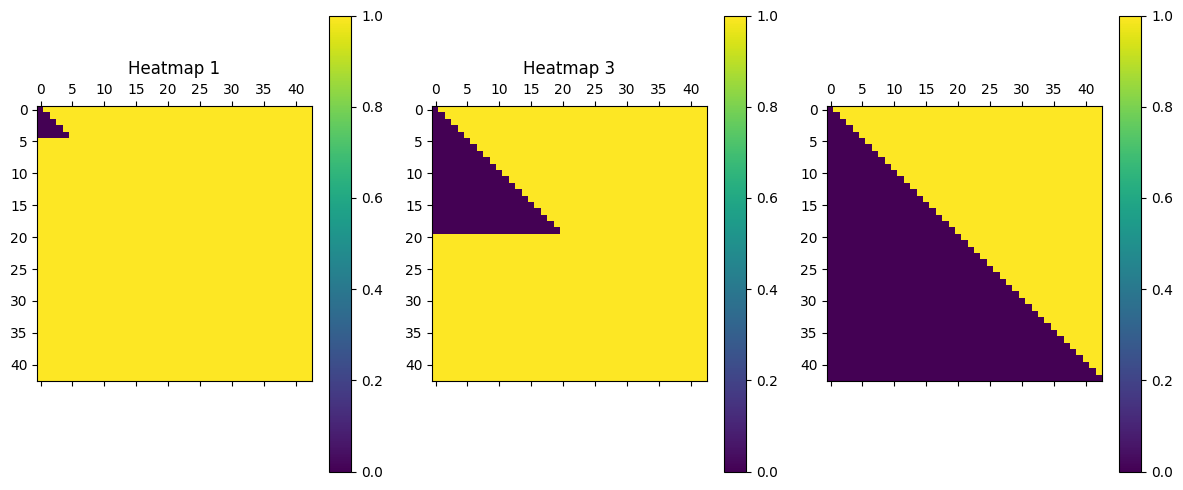

In [41]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

cax1 = ax1.matshow(target_masks_fr_torch[0], cmap='viridis')
fig.colorbar(cax1, ax=ax1)
ax1.set_title("Heatmap 1")

cax2 = ax2.matshow(target_masks_fr_torch[7], cmap='viridis')
fig.colorbar(cax2, ax=ax2)
ax2.set_title("Heatmap 2")

cax3 = ax3.matshow(target_masks_fr_torch[9], cmap='viridis')
fig.colorbar(cax3, ax=ax3)
ax2.set_title("Heatmap 3")

plt.tight_layout()
plt.show()




# Tidied up code (RAM memory issues)

In [1]:
!pip install datasets tokenizers

In [1]:
from datasets import load_dataset

dataset = load_dataset("opus_books", "en-fr", split="train[:30%]")

In [4]:
dataset

Dataset({
    features: ['id', 'translation'],
    num_rows: 12708
})

In [3]:
subset = dataset['train'].select(list(range(20)))

In [2]:
import random

# Split ratios
train_ratio = 0.8
val_ratio = 0.1

# # Shuffle the indices
# indices = list(range(len(dataset['train'])))
# random.seed(42)
# random.shuffle(indices)

# # Calculate split sizes
# train_size = int(train_ratio * len(dataset['train']))
# val_size = int(val_ratio * len(dataset['train']))

# # Split the indices
# train_indices = indices[:train_size]
# val_indices = indices[train_size:train_size+val_size]
# test_indices = indices[train_size+val_size:]

# # Extract subsets based on indices
# train_dataset = dataset['train'].select(train_indices)
# val_dataset = dataset['train'].select(val_indices)
# test_dataset = dataset['train'].select(test_indices)

# Shuffle the indices
indices = list(range(len(dataset)))
random.seed(42)
random.shuffle(indices)

# Calculate split sizes
train_size = int(train_ratio * len(dataset))
val_size = int(val_ratio * len(dataset))

# Split the indices
train_indices = indices[:train_size]
val_indices = indices[train_size:train_size+val_size]
test_indices = indices[train_size+val_size:]

# Extract subsets based on indices
train_dataset = dataset.select(train_indices)
val_dataset = dataset.select(val_indices)
test_dataset = dataset.select(test_indices)

# # Shuffle the indices
# indices = list(range(len(subset)))
# random.seed(42)
# random.shuffle(indices)

# # Calculate split sizes
# train_size = int(train_ratio * len(subset))
# val_size = int(val_ratio * len(subset))

# # Split the indices
# train_indices = indices[:train_size]
# val_indices = indices[train_size:train_size+val_size]
# test_indices = indices[train_size+val_size:]

# # Extract subsets based on indices
# train_dataset = subset.select(train_indices)
# val_dataset = subset.select(val_indices)
# test_dataset = subset.select(test_indices)


In [3]:
print(len(dataset))
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

38126
30500
3812
3814


In [4]:
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.trainers import WordLevelTrainer
from tokenizers.pre_tokenizers import Whitespace

SPECIAL_TOKENS = ["[UNK]", "[PAD]", "[SOS]", "[EOS]"]
UNK_TOKEN = "[UNK]"

def train_tokenizer(dataset, language):
    def get_all_sentences(ds, lang):
        return (item['translation'][lang] for item in ds)

    tokenizer = Tokenizer(WordLevel(unk_token=UNK_TOKEN))
    tokenizer.pre_tokenizer = Whitespace()

    trainer = WordLevelTrainer(special_tokens=SPECIAL_TOKENS)
    tokenizer.train_from_iterator(get_all_sentences(dataset, language), trainer=trainer)

    return tokenizer

tokenizer_en = train_tokenizer(train_dataset, 'en')
tokenizer_fr = train_tokenizer(train_dataset, 'fr')


In [ ]:
import torch

def preprocess_data(dataset, tokenizer_en, tokenizer_fr):

    # Tokenize data
    def tokenize_data(dataset):
        tokenized_data_en = []
        tokenized_data_fr = []
        for example in dataset['translation']:
            tokenized_data_en.append(tokenizer_en.encode(example['en']).ids)
            tokenized_data_fr.append(tokenizer_fr.encode(example['fr']).ids)
        return tokenized_data_en, tokenized_data_fr

    tokenized_data_en, tokenized_data_fr = tokenize_data(dataset)

    # Add special tokens
    def add_special_tokens(tokenized_data, tokenizer):
        SOS_token = tokenizer.token_to_id("[SOS]")
        EOS_token = tokenizer.token_to_id("[EOS]")
        return [[SOS_token] + seq + [EOS_token] for seq in tokenized_data]

    tokenized_data_en_with_special_tokens = add_special_tokens(tokenized_data_en, tokenizer_en)
    tokenized_data_fr_with_special_tokens = add_special_tokens(tokenized_data_fr, tokenizer_fr)

    # Get max lengths
    MAX_LENGTH_EN = max(len(seq) for seq in tokenized_data_en_with_special_tokens)
    MAX_LENGTH_FR = max(len(seq) for seq in tokenized_data_fr_with_special_tokens)

    # Pad sequences
    def pad(sequence, max_length, pad_token_id=1):
        if len(sequence) < max_length:
            sequence += [pad_token_id] * (max_length - len(sequence))
        return sequence

    padded_data_en = [pad(seq, MAX_LENGTH_EN) for seq in tokenized_data_en_with_special_tokens]
    padded_data_fr = [pad(seq, MAX_LENGTH_FR) for seq in tokenized_data_fr_with_special_tokens]

    # Create attention masks
    def create_attention_masks(padded_data):
        return [[1 if token != 1 else 0 for token in sequence] for sequence in padded_data]

    attention_masks_en = create_attention_masks(padded_data_en)
    attention_masks_fr = create_attention_masks(padded_data_fr)

    # Create target mask for decoder
    def create_target_mask_torch(sequence):
        sequence_tensor = torch.tensor(sequence)
        look_ahead_mask = torch.triu(torch.ones((len(sequence), len(sequence))), diagonal=1)
        padding_mask = (sequence_tensor == 1).unsqueeze(-1).float()
        combined_mask = torch.maximum(look_ahead_mask, padding_mask)
        return combined_mask

    target_masks_fr_torch = [create_target_mask_torch(sequence) for sequence in padded_data_fr]

    return padded_data_en, padded_data_fr, attention_masks_en, attention_masks_fr, target_masks_fr_torch

train_data_en, train_data_fr, train_masks_en, train_masks_fr, train_target_masks_fr = preprocess_data(train_dataset, tokenizer_en, tokenizer_fr)
val_data_en, val_data_fr, val_masks_en, val_masks_fr, val_target_masks_fr = preprocess_data(val_dataset, tokenizer_en, tokenizer_fr)
test_data_en, test_data_fr, test_masks_en, test_masks_fr, test_target_masks_fr = preprocess_data(test_dataset, tokenizer_en, tokenizer_fr)


In [10]:
print(train_data_en[1])
print(train_masks_en[1])
print(train_data_fr[1])
print(train_masks_fr[1])
print(train_target_masks_fr[1])

[2, 48, 6, 603, 7, 26, 249, 105, 137, 272, 648, 73, 33, 3798, 1822, 45, 23, 5692, 110, 14, 5, 1077, 1219, 13, 282, 4, 1925, 158, 41, 5, 455, 9, 5358, 14, 16, 13237, 4, 78, 20, 50, 11712, 31, 5, 2312, 8374, 4, 5880, 8, 5, 2008, 9, 16, 322, 2139, 4, 2450, 27, 3207, 5408, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
import torch
import gc

def preprocess_data(dataset, tokenizer_en, tokenizer_fr, batch_size=1000):

    # Tokenize data
    def tokenize_data(dataset):
        tokenized_data_en = []
        tokenized_data_fr = []
        for example in dataset['translation']:
            tokenized_data_en.append(tokenizer_en.encode(example['en']).ids)
            tokenized_data_fr.append(tokenizer_fr.encode(example['fr']).ids)
        return tokenized_data_en, tokenized_data_fr

    # Add special tokens
    def add_special_tokens(tokenized_data, tokenizer):
        SOS_token = tokenizer.token_to_id("[SOS]")
        EOS_token = tokenizer.token_to_id("[EOS]")
        return [[SOS_token] + seq + [EOS_token] for seq in tokenized_data]

    # Pad sequences
    def pad(sequence, max_length, pad_token_id=1):
        if len(sequence) < max_length:
            sequence += [pad_token_id] * (max_length - len(sequence))
        return sequence

    # Create attention masks
    def create_attention_masks(padded_data):
        return [[1 if token != 1 else 0 for token in sequence] for sequence in padded_data]

    # Create target mask for decoder
    def create_target_mask_torch(sequence):
        sequence_tensor = torch.tensor(sequence)
        look_ahead_mask = torch.triu(torch.ones((len(sequence), len(sequence))), diagonal=1)
        padding_mask = (sequence_tensor == 1).unsqueeze(-1).float()
        combined_mask = torch.maximum(look_ahead_mask, padding_mask)
        return combined_mask

    total_data_len = len(dataset)
    all_padded_en, all_padded_fr, all_masks_en, all_masks_fr, all_target_masks_fr = [], [], [], [], []

    for start_idx in range(0, total_data_len, batch_size):
        end_idx = min(start_idx + batch_size, total_data_len)
        batch = dataset.select(list(range(start_idx, end_idx)))

        # Your existing preprocessing code...
        tokenized_data_en, tokenized_data_fr = tokenize_data(dataset)
        tokenized_data_en_with_special_tokens = add_special_tokens(tokenized_data_en, tokenizer_en)
        tokenized_data_fr_with_special_tokens = add_special_tokens(tokenized_data_fr, tokenizer_fr)
        MAX_LENGTH_EN = max(len(seq) for seq in tokenized_data_en_with_special_tokens)
        MAX_LENGTH_FR = max(len(seq) for seq in tokenized_data_fr_with_special_tokens)
        padded_data_en = [pad(seq, MAX_LENGTH_EN) for seq in tokenized_data_en_with_special_tokens]
        padded_data_fr = [pad(seq, MAX_LENGTH_FR) for seq in tokenized_data_fr_with_special_tokens]
        attention_masks_en = create_attention_masks(padded_data_en)
        attention_masks_fr = create_attention_masks(padded_data_fr)
        target_masks_fr_torch = [create_target_mask_torch(sequence) for sequence in padded_data_fr]

        all_padded_en.extend(padded_data_en)
        all_padded_fr.extend(padded_data_fr)
        all_masks_en.extend(attention_masks_en)
        all_masks_fr.extend(attention_masks_fr)
        all_target_masks_fr.extend(target_masks_fr_torch)

        # Clean up temporary lists to free up memory
        del padded_data_en, padded_data_fr, attention_masks_en, attention_masks_fr, target_masks_fr_torch
        gc.collect()

    return all_padded_en, all_padded_fr, all_masks_en, all_masks_fr, all_target_masks_fr


# Refactored Code

In [2]:
from datasets import load_dataset

dataset = load_dataset("opus_books", "en-fr", split="train[:1%]")

In [4]:
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.trainers import WordLevelTrainer
from tokenizers.pre_tokenizers import Whitespace

SPECIAL_TOKENS = ["[UNK]", "[PAD]", "[SOS]", "[EOS]"]
UNK_TOKEN = "[UNK]"

def train_tokenizer(dataset, language):
    def get_all_sentences(ds, lang):
        return (item['translation'][lang] for item in ds)

    tokenizer = Tokenizer(WordLevel(unk_token=UNK_TOKEN))
    tokenizer.pre_tokenizer = Whitespace()

    trainer = WordLevelTrainer(special_tokens=SPECIAL_TOKENS)
    tokenizer.train_from_iterator(get_all_sentences(dataset, language), trainer=trainer)

    return tokenizer

tokenizer_en = train_tokenizer(dataset, 'en')
tokenizer_fr = train_tokenizer(dataset, 'fr')

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset


class TranslationDataset(Dataset):
    def __init__(self, ds, tokenizer_src, tokenizer_tgt, src_lang, tgt_lang, src_seq_len, tgt_seq_len):
        super().__init__()
        self.ds = ds
        self.tokenizer_src = tokenizer_src
        self.tokenizer_tgt = tokenizer_tgt
        self.src_lang = src_lang
        self.tgt_lang = tgt_lang
        self.src_seq_len = src_seq_len
        self.tgt_seq_len = tgt_seq_len
        self.sos_token = torch.tensor([tokenizer_tgt.token_to_id("[SOS]")], dtype=torch.int64)
        self.eos_token = torch.tensor([tokenizer_tgt.token_to_id("[EOS]")], dtype=torch.int64)
        self.pad_token = torch.tensor([tokenizer_tgt.token_to_id("[PAD]")], dtype=torch.int64)

    def __len__(self):
        return len(self.ds)

    def _process_text(self, text, tokenizer, seq_len):
        """Tokenize text and handle SOS, EOS, and padding."""
        tokens = tokenizer.encode(text).ids
        num_padding_tokens = seq_len - len(tokens) - 2  # Account for SOS and EOS tokens
        if num_padding_tokens < 0:
            raise ValueError("Sentence exceeds maximum sequence length")

        # Concatenate tokens with special tokens and padding
        return torch.cat([
            self.sos_token,
            torch.tensor(tokens, dtype=torch.int64),
            self.eos_token,
            torch.tensor([self.pad_token] * num_padding_tokens, dtype=torch.int64)
        ], dim=0)

    def __getitem__(self, idx):
        src_target_pair = self.ds[idx]
        src_text = src_target_pair['translation'][self.src_lang]
        tgt_text = src_target_pair['translation'][self.tgt_lang]

        encoder_input = self._process_text(src_text, self.tokenizer_src, self.src_seq_len)
        decoder_input = self._process_text(tgt_text, self.tokenizer_tgt, self.tgt_seq_len)

        # Create label for the target text, without the SOS token but with the EOS token
        label = torch.cat([
            torch.tensor(self.tokenizer_tgt.encode(tgt_text).ids, dtype=torch.int64),
            self.eos_token
        ], dim=0)
        label = torch.cat([label, torch.tensor([self.pad_token] * (self.tgt_seq_len - len(label)), dtype=torch.int64)], dim=0)

        return {
            "encoder_input": encoder_input,
            "decoder_input": decoder_input,
            "encoder_mask": (encoder_input != self.pad_token).unsqueeze(0).unsqueeze(0).int(),
            "decoder_mask": (decoder_input != self.pad_token).unsqueeze(0).int() & causal_mask(decoder_input.size(0)),
            "label": label,
            "src_text": src_text,
            "tgt_text": tgt_text
        }

def causal_mask(size):
    mask = torch.triu(torch.ones((1, size, size)), diagonal=1).type(torch.int)
    return mask == 0


In [6]:
# Assuming you've trained tokenizer_en and tokenizer_fr
src_seq_len = 100  # Example sequence length, you can adjust
tgt_seq_len = 120  # Example sequence length, you can adjust

ds = TranslationDataset(dataset, tokenizer_en, tokenizer_fr, 'en', 'fr', src_seq_len, tgt_seq_len)

for i in range(2):
    sample = ds[i]
    print("Source Text:", sample["src_text"])
    print("Target Text:", sample["tgt_text"])
    print("Encoder Input:", sample["encoder_input"])
    print("Decoder Input:", sample["decoder_input"])
    print("Label:", sample["label"])
    print('-' * 50)


Source Text: The Wanderer
Target Text: Le grand Meaulnes
Encoder Input: tensor([   2,   37, 2021,    3,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1])
Decoder Input: tensor([ 2, 83, 52, 31,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,


## The output examined

1. **Source Text**: "The Wanderer"
2. **Target Text**: "Le grand Meaulnes"
3. **Encoder Input**: This represents the tokenized and padded version of the source text. The sequence starts with the SOS token, followed by the tokenized sequence of the source text, the EOS token, and then padding (if required) until it reaches the specified `src_seq_len`.
4. **Decoder Input**: This represents the tokenized and padded version of the target text. Just like the encoder input, it starts with an SOS token, followed by the tokenized sequence of the target text, an EOS token, and padding until `tgt_seq_len`.
5. **Label**: This is similar to the `decoder_input`, but without the SOS token at the start. It starts directly with the tokenized sequence, then the EOS token, and finally the padding.

Let's analyze the output:

- `Encoder Input` has the sequence [2, 37, 2021, 3,...]. Here, `2` is the SOS token, `37` and `2021` are the token IDs for "The" and "Wanderer" respectively, `3` is the EOS token, and the rest are padding tokens (`1`).
  
- `Decoder Input` starts with `2` (SOS token), followed by the token IDs for "Le", "grand", and "Meaulnes", then the EOS token `3`, and the rest are padding tokens (`1`).

- `Label` starts directly with the token IDs for "Le", "grand", and "Meaulnes", followed by the EOS token, and then the padding tokens.

From a first glance, the output seems consistent with the logic you've implemented, and the tokens align with the expected tokens for the SOS, EOS, and PAD tokens.

However, there are a few things to check:
1. Ensure that the token IDs align correctly with the words in the tokenizers.
2. Verify that the sequences are correctly padded to the specified sequence lengths (`src_seq_len` and `tgt_seq_len`).
3. It's essential to make sure that this consistent formatting holds true for all the other samples in the dataset.

If all of the above checks out, then the output is indeed okay.

# Glossary

To plot two graphs side by side using `matplotlib`, you can use the `subplots` function. Here's how you can do it:

1. Create a figure and axes using `plt.subplots`.
2. Plot on each of the axes.
3. Adjust settings as needed.

Here's a simple example to plot two heatmaps side by side:

``` python
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data1 = np.random.random((10, 10))
data2 = np.random.random((10, 10))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plotting on the first axis
cax1 = ax1.matshow(data1, cmap='viridis')
fig.colorbar(cax1, ax=ax1)
ax1.set_title("Heatmap 1")

# Plotting on the second axis
cax2 = ax2.matshow(data2, cmap='viridis')
fig.colorbar(cax2, ax=ax2)
ax2.set_title("Heatmap 2")

plt.tight_layout()
plt.show()
```

You can replace `data1` and `data2` with your masks or any other data you'd like to visualize. Adjust the `figsize` argument to change the size of the entire figure.

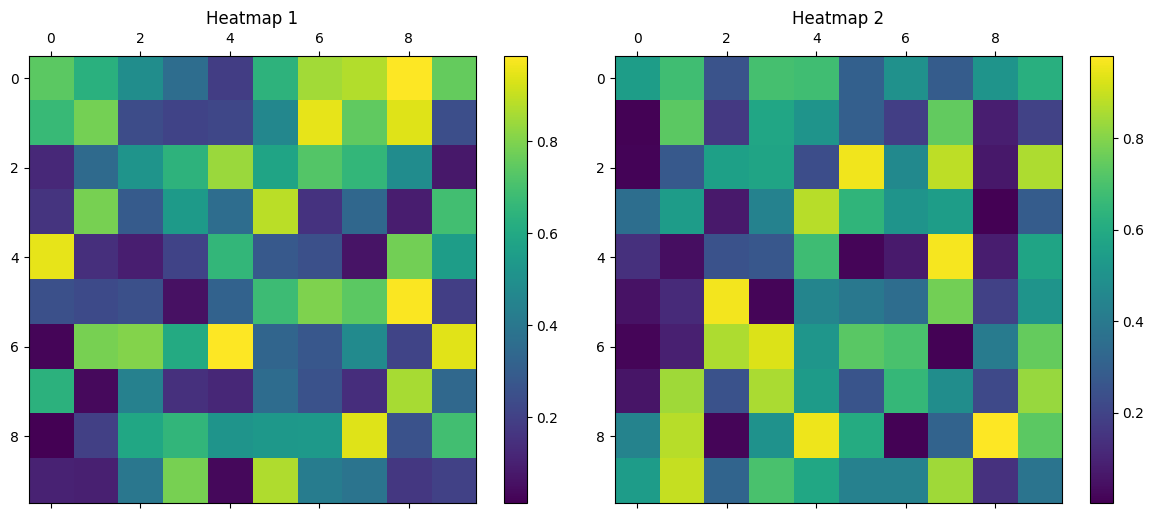

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data1 = np.random.random((10, 10))
data2 = np.random.random((10, 10))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plotting on the first axis
cax1 = ax1.matshow(data1, cmap='viridis')
fig.colorbar(cax1, ax=ax1)
ax1.set_title("Heatmap 1")

# Plotting on the second axis
cax2 = ax2.matshow(data2, cmap='viridis')
fig.colorbar(cax2, ax=ax2)
ax2.set_title("Heatmap 2")

plt.tight_layout()
plt.show()
